<a href="https://colab.research.google.com/github/AkashSalmuthe/Airbnb-Bookings-Analysis---Akash-Salmuthe/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Libraries

import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from skimage.io import imread

In [3]:
# Load The Dataset

##path = '/content/drive/MyDrive/Capstone Projects/Exploratory Data Analysis/Airbnb Bookings Analysis - Akash Salmuthe/'

df = pd.read_csv('/content/drive/MyDrive/Capstone Projects/1. Exploratory Data Analysis/Airbnb Bookings Analysis - Akash Salmuthe/Airbnb NYC 2019.csv')

# **Exploaration of Dataset**

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


# **Dataset Information**

In [6]:
#df.duplicated()
df.duplicated().sum()

0

In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
df.shape

(48895, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# **Dataset Overview**

* In this dataset, there are 48895 entries and 16 features (Columns )
* 10 out of 16 are numeric:
  ['id', 'host_id', 'latitude', 'longitude', price, 'number_of_reviews' 'reviews_per_month', 'calculated_host_listings_count', 'availability_365' ]

* 6 out of 16 are categorical: [ 'name', 'host_name', 'neighbourhood_group' 'neighbourhood','room_type','minimum_nights', 'last_review']

# **Data Cleaning**

### **Unique values For Variable Identification**

In [10]:
#checking unique values for all columns(imp for knowing the categorical and numerical variables)
df.describe(include='all').loc['unique', :]

id                                  NaN
name                              47905
host_id                             NaN
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                            NaN
longitude                           NaN
room_type                             3
price                               NaN
minimum_nights                      NaN
number_of_reviews                   NaN
last_review                        1764
reviews_per_month                   NaN
calculated_host_listings_count      NaN
availability_365                    NaN
Name: unique, dtype: object

From the above information we get to know that the name, host_name, neighbourhood_group, neighbourhood, room_type and last_review_per_month seems as categorical variables. 
But out of 48895 records name has 47905 unique values almost same and last_review is date column.

In [11]:
#getting to know the description of data
df.describe().round(2)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.00,4.889500e+04,48895.00,48895.00,48895.00,48895.00,48895.00,38843.00,48895.00,48895.00
mean,19017143.24,6.762001e+07,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,10983108.39,7.861097e+07,0.05,0.05,240.15,20.51,44.55,1.68,32.95,131.62
min,2539.00,2.438000e+03,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,9471945.00,7.822033e+06,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,19677284.00,3.079382e+07,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,29152178.50,1.074344e+08,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,36487245.00,2.743213e+08,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


From the above information we can observe that the host id is unique id and we can skip that on this features like min,max and main important point is price is having outliners by measuring range and observing inter quartile ranges

In [12]:
len(df[df['price']==0])

11

In [13]:
df[df['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


## **Checking for Null values**

In [14]:
#checking null values
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

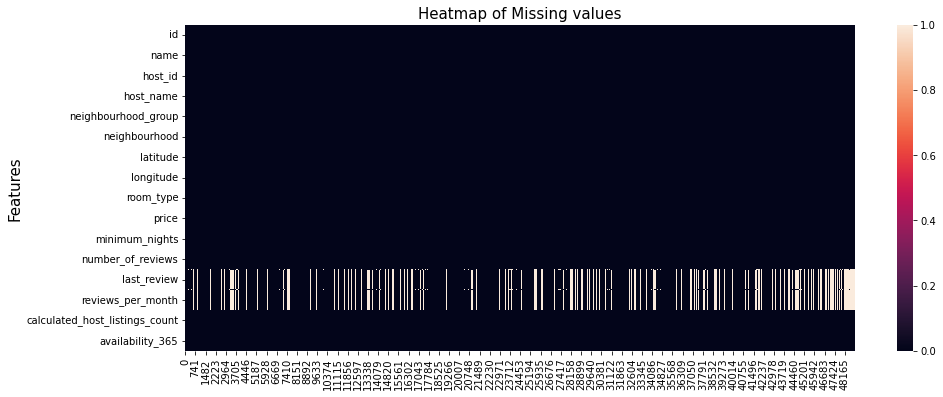

In [15]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull().T)

plt.title("Heatmap of Missing values",fontsize=15)
#plt.xlable("Feature",fontsize=15)
plt.ylabel("Features",fontsize=15)
plt.show()

# **Handling Missing Values**

In [16]:
#filling nan with unknown as we dont know the name
df['name'].fillna('unknown',inplace=True) 

#filling nan with no_name as we dont know the hostname
df['host_name'].fillna('no_name',inplace=True) 

#filling nan with 0 and as type integer beacause it is quantitative
df['reviews_per_month']=df['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')

#last review it is unnecessary we can drop the column
df.drop(['id','last_review'],axis=1,inplace=True)

**column**: 'last_review' has many null values. And since it's not much required for our analysis as compared to number_of_reviews & reviews_per_month. We're good to drop this column.

#### **Checking For any null values remaining**

In [17]:
#checking for null and dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48895 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               48895 non-null  int64  
 12  calculated_host_listings_count  

## **Skewness and kurtosis**

In [18]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


host_id                            1.206214
latitude                           0.237167
longitude                          1.284210
price                             19.118939
minimum_nights                    21.827275
number_of_reviews                  3.690635
reviews_per_month                  3.751642
calculated_host_listings_count     7.933174
availability_365                   0.763408
dtype: float64

In [19]:
df.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


host_id                             0.169106
latitude                            0.148845
longitude                           5.021646
price                             585.672879
minimum_nights                    854.071662
number_of_reviews                  19.529788
reviews_per_month                  54.337612
calculated_host_listings_count     67.550888
availability_365                   -0.997534
dtype: float64

# **Outlier Detection & Treatment**

### **Univariate outliers:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


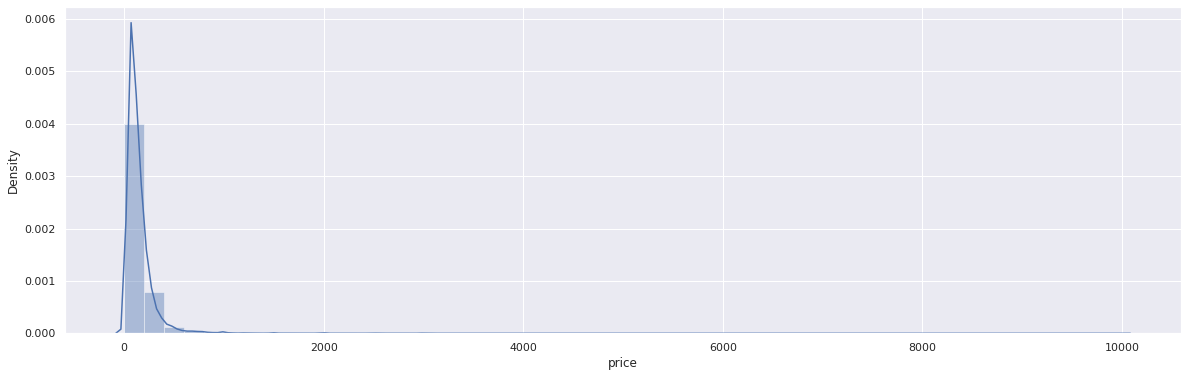

In [20]:
sns.set(rc={"figure.figsize": (20, 6)})

sns.distplot(df['price'],hist=True)
plt.show()

The distribution tells it has positive skew also the distribution doesn't deviate much from normal distribution.

Since the skewness has value>1 it is highly skewed.

Also kurtosis looks high as well which indicates presence of good amount of outliers,we will look later into that when we handle outliers!!

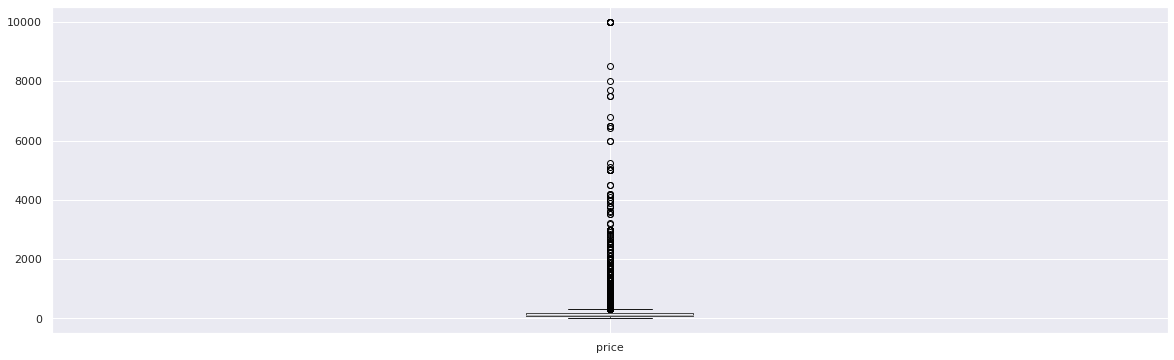

In [21]:
df.boxplot(column=['price'])
plt.show()


There are so many outliers are present in price

### **Multivariate  outliers:**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


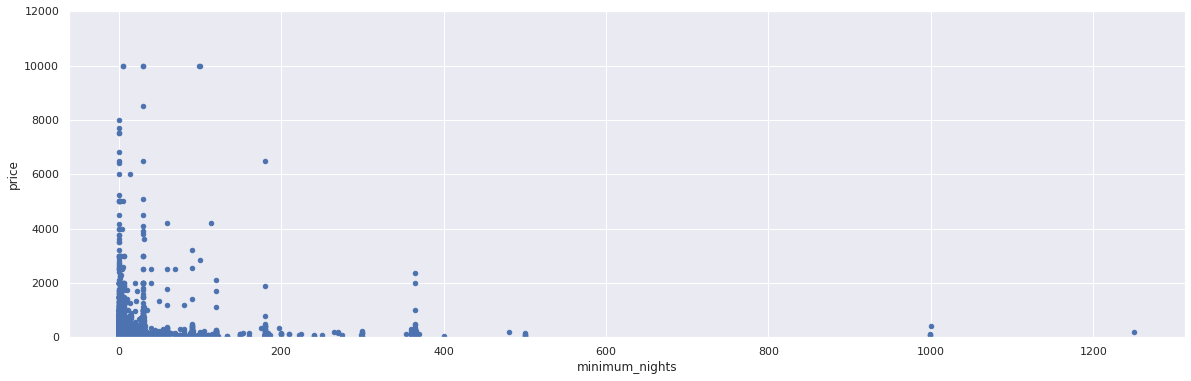

In [22]:
# price vs minimum_nights

var='minimum_nights'

data=pd.concat([df['price'],df[var]],axis=1)
data.plot.scatter(x=var,y='price',ylim=(0,12000))

looks many data points are clustured on 0 price range, few have min nights for stay but price is 0. looks like anomaly in price.

there are many outliers as well

## **Outliers Treatment**

In [23]:
len(df[df['price']==0])

11

In [24]:
df['price'].median()

106.0

In [25]:
newdf = df.copy()
newdf

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,6,2


In [26]:
newdf['price'] = np.where((newdf['price'] == 0) & 
                          (newdf['minimum_nights'] == 1) ,round(df['price'].median()) , newdf['price'])

In [27]:
newdf.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527272e+02,2.401515e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,48895.0,8.062583e-01,1.502767e+00,0.00000,0.000000e+00,0.000000e+00,1.000000e+00,5.800000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [28]:
len(newdf[newdf['price']==0])

8

In [29]:
#Function that gives a new price according to minimum night
def price_calculator(min_night):
  '''Get the price based on the minimum night you are given'''
  median_price = round(df['price'].median())
  new_price = median_price * min_night

  return new_price

In [30]:
#Replace the value of price according to minimum night where price = 0$ 
newdf['price'] = np.where(
   (newdf['price'] == 0) ,price_calculator(newdf['minimum_nights']) , newdf['price'])

In [31]:
newdf.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.528963e+02,2.409335e+02,10.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,48895.0,8.062583e-01,1.502767e+00,0.00000,0.000000e+00,0.000000e+00,1.000000e+00,5.800000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [32]:
len(newdf[newdf['price']==0])

0

In [33]:
df['price'].mean()

152.7206871868289

In [34]:
newdf['price'].mean()

152.8962879640045

## **Outliers Removal by Quantile method**

In [35]:
min_threshold,max_threshold= newdf.price.quantile([0.01,0.999])
min_threshold,max_threshold

(30.0, 3000.0)

In [36]:
#prices less than min threshold!
newdf[newdf.price<min_threshold]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
957,Enjoy Staten Island Hospitality,1887999,Rimma & Jim,Staten Island,Graniteville,40.62109,-74.16534,Private room,20,3,80,0,1,226
2675,"Central, Peaceful Semi-Private Room",5912572,Tangier,Brooklyn,Flatbush,40.63899,-73.95177,Shared room,29,2,5,0,1,321
2860,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,0,4,137
3020,Small Cozy Room Wifi & AC near JFK,9284163,Antonio,Queens,Woodhaven,40.68968,-73.85219,Private room,29,2,386,5,3,50
3918,"Bright, Airy Room Share for 2",4973668,Gloria,Brooklyn,Bedford-Stuyvesant,40.68642,-73.93440,Shared room,25,5,76,1,3,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48486,"Cable and wfi, L/G included.",272872092,Chris,Queens,Forest Hills,40.73657,-73.85088,Entire home/apt,16,9,1,1,1,322
48647,Cozy bedroom in diverse neighborhood near JFK,273393150,Liza,Queens,Richmond Hill,40.68639,-73.81847,Private room,28,2,0,0,1,24
48832,FLATBUSH HANG OUT AND GO,267223765,Jarmel,Brooklyn,Flatbush,40.64922,-73.96078,Shared room,20,1,0,0,3,363
48867,The place you were dreaming for.(only for guys),261338177,Diana,Brooklyn,Gravesend,40.59080,-73.97116,Shared room,25,1,0,0,6,338


In [37]:
# similary for getting extreme price value above max_threshold
newdf[newdf.price>max_threshold]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1862,"Sunny, Family-Friendly 2 Bedroom",4289240,Lucy,Brooklyn,Prospect Heights,40.67919,-73.97191,Entire home/apt,4000,4,0,0,1,83
2698,Beautiful 1 Bedroom in Nolita/Soho,213266,Jessica,Manhattan,Nolita,40.72193,-73.99379,Entire home/apt,5000,1,2,0,1,365
3537,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,0,1,359
3695,NYC SuperBowl Wk 5 Bdrs River View,11353904,Todd,Manhattan,Upper West Side,40.79476,-73.97299,Entire home/apt,4000,1,0,0,1,0
3720,"SuperBowl Penthouse Loft 3,000 sqft",1483320,Omri,Manhattan,Little Italy,40.71895,-73.99793,Entire home/apt,5250,1,0,0,1,0
3774,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Jonathan,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,0,1,0
3788,Prime NYC Location for Super Bowl,1427243,Jordana,Manhattan,East Village,40.73323,-73.98859,Entire home/apt,3750,1,0,0,1,0
4345,NearWilliamsburg bridge 11211 BK,14908606,Bianca,Brooklyn,Bedford-Stuyvesant,40.69572,-73.95731,Private room,5000,6,10,0,1,363
4376,Photography Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69127,-73.96563,Entire home/apt,4500,1,5,0,11,365
4377,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,0,11,365


In [38]:
quantdf= newdf[(newdf.price>min_threshold)&(newdf.price<max_threshold)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


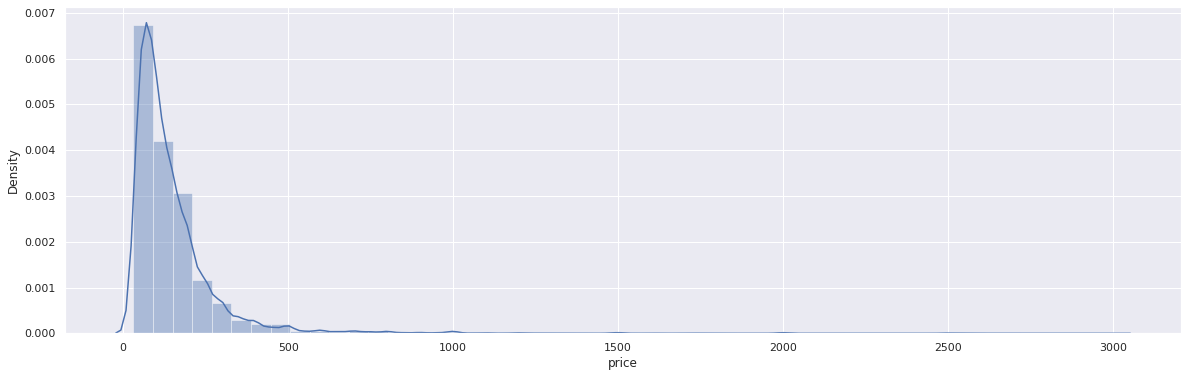

In [39]:
sns.distplot(quantdf['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


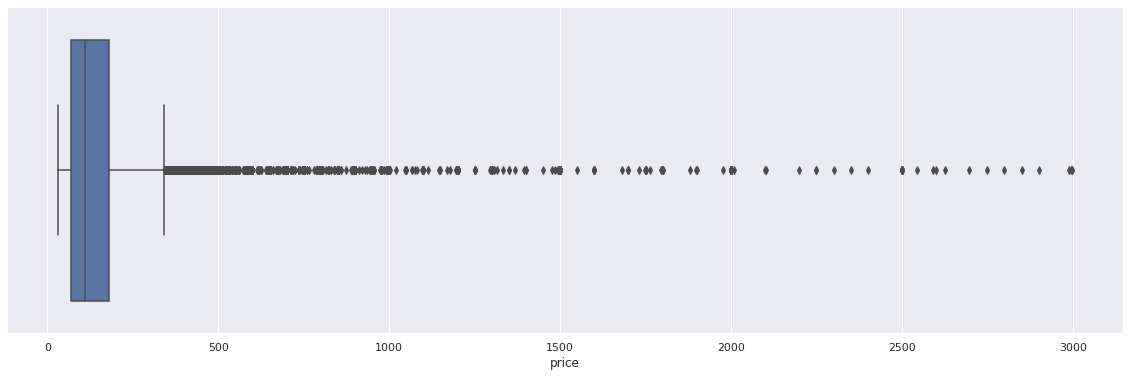

In [40]:

sns.boxplot(quantdf['price']) 

### looks there are still many outliers!

In [41]:
#skewness and kurtosis
print("Skewness: %f" % quantdf['price'].skew())
print("Kurtosis: %f" % quantdf['price'].kurt())

Skewness: 6.376769
Kurtosis: 70.371622


## **Outliers Removal by IQR method**

In [42]:
Q1 = newdf.quantile(0.25)
Q3 = newdf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

host_id                           9.961239e+07
latitude                          7.301500e-02
longitude                         4.679500e-02
price                             1.060000e+02
minimum_nights                    4.000000e+00
number_of_reviews                 2.300000e+01
reviews_per_month                 1.000000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  2.270000e+02
dtype: float64


In [43]:
"""
a outlier function for removing outliers!

"""
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 
 return lower_range,upper_range

In [44]:
lower_bound,upper_bound = outlier_treatment(newdf['price'])
lower_bound,upper_bound

(-90.0, 334.0)

In [45]:
#looking at the low and upper range outliers
newdf[(newdf.price < lower_bound) | (newdf.price > upper_bound)] 

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
61,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,0,1,180
85,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,0,1,7
103,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,0,2,243
114,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,0,4,298
121,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,0,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,0,1,364
48833,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,0,1,64
48839,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,0,1,23
48842,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,0,1,9


In [46]:
#subsetting only those rows having datapoints greater than lower range and lesser than upper range respectively
iqrdf = newdf[(newdf.price>lower_bound) & (newdf.price<upper_bound)]

In [47]:
iqrdf

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,6,2


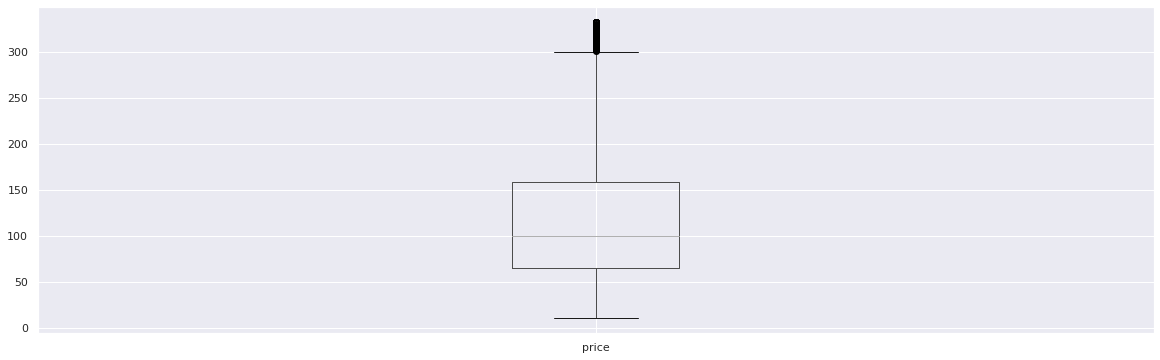

In [48]:
iqrdf.boxplot(column='price')

## boxplot for price now looks good without outliers!

In [49]:
#skewness and kurtosis
print("Skewness: %f" % iqrdf['price'].skew())
print("Kurtosis: %f" % iqrdf['price'].kurt())

Skewness: 0.923814
Kurtosis: 0.169437


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


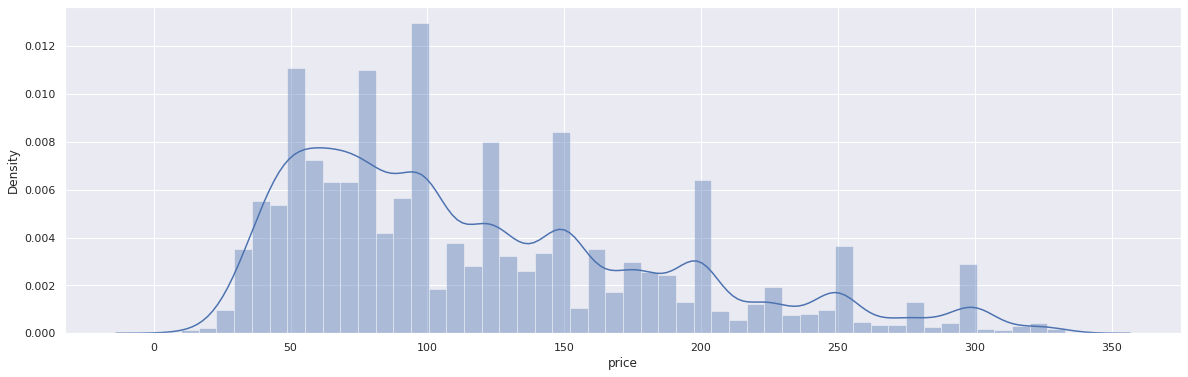

In [50]:
sns.distplot(iqrdf['price'])

Iqr method did the best and as we can see the skewness is less than 1 and this df will be used to find the price distribution on remaining features as this df will not have any impact from outliers

# **Data Analysis**

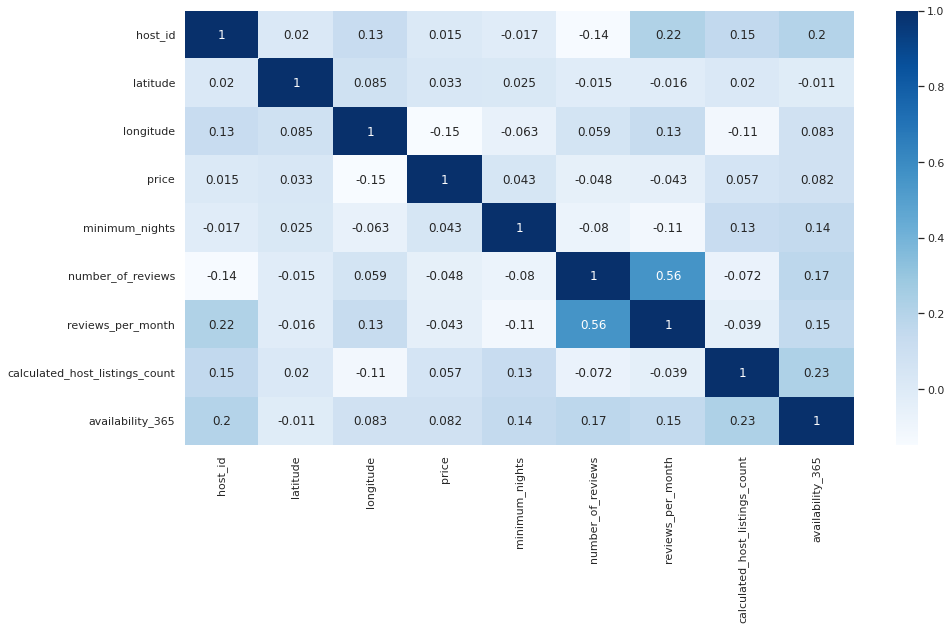

In [51]:
plt.figure(figsize=(15,8))
sns.heatmap(newdf.corr(), annot=True, cmap = 'Blues')
plt.show()

Observation:

* There's correlation among host_id to reveiws_per_month & availability_365.

* Also there's noticiable correlation between min_nights to no_of_listings_count & availability_365. Price also shows some correlation with availability_365 & host_listings_count.

* no_of_reviews and reviews_per_month gives almost the same information. so we can carry out analysis with any of the two variable. Also, no_of_reviews is correlated to availability_365!

In [52]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48895 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               48895 non-null  int64  
 12  calculated_host_listings_count  

# **Categorical Column Analysis**

## **1. Most No of Listings in NYC**

In [53]:
df.name.nunique()

47906

In [54]:
df.name.value_counts

<bound method IndexOpsMixin.value_counts of 0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object>

In [55]:
top_5_listings_count_df=df['name'].value_counts()[:5].reset_index()
top_5_listings_count_df.rename(columns={'index':'Listings_on_Airbnb','name':'Total_listings'},inplace=True)
top_5_listings_count_df

,Listings_on_Airbnb,Total_listings
0,Hillside Hotel,18
1,Home away from home,17
2,unknown,16
3,New york Multi-unit building,16
4,Brooklyn Apartment,12


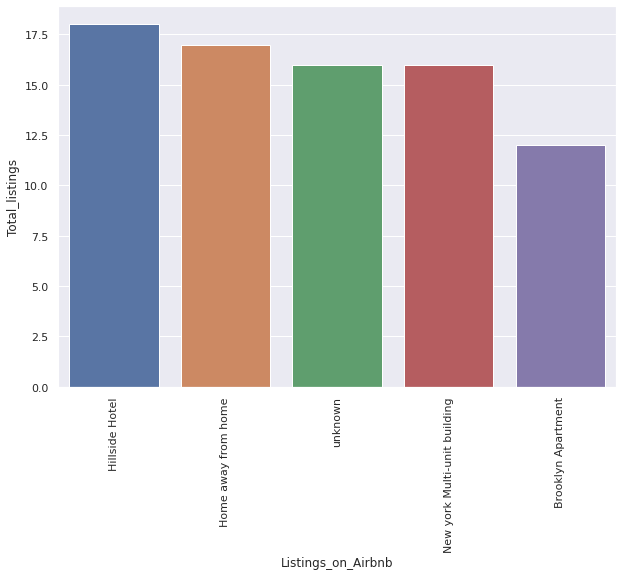

In [56]:
plt.figure(figsize=(10,7))
ax=sns.barplot(x='Listings_on_Airbnb',y='Total_listings',data=top_5_listings_count_df)

for item in ax.get_xticklabels():
    item.set_rotation(90)

**Hillside Hotel is found to have listed more listings in entire NYC, followed by Home away from Home.**

## **2. What are the host ids with most listings counts?**

In [57]:
df.host_id.nunique()

37457

In [58]:
df.host_id.value_counts

<bound method IndexOpsMixin.value_counts of 0            2787
1            2845
2            4632
3            4869
4            7192
           ...   
48890     8232441
48891     6570630
48892    23492952
48893    30985759
48894    68119814
Name: host_id, Length: 48895, dtype: int64>

In [59]:
top_10_host_id=df['host_id'].value_counts()[:10].reset_index()
top_10_host_id.rename(columns={'index':'Host_Id','host_id':'Total_listings'},inplace=True)
top_10_host_id

,Host_Id,Total_listings
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


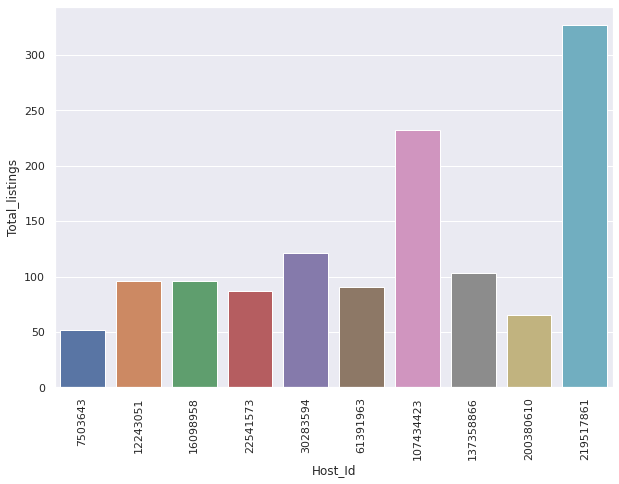

In [60]:
plt.figure(figsize=(10,7))
ax=sns.barplot(x='Host_Id',y='Total_listings',data=top_10_host_id)
for item in ax.get_xticklabels():
  item.set_rotation(90)

In [61]:
#df_name = df[df['host_id']==219517861]
#df_name['host_name'].unique()

# def host_name(top_10_host_id['Host_Id']):
#   lst=[]
#   for id in top_10_host_id['Host_Id']:
    
#     lst.append(df[df['host_id']==id])
#     return lst


In [62]:
# host_name(top_10_host_id['Host_Id'])

### Host id 219517861 is found to have listed more listings in entire NYC with 327, followed by 107434423.

## **3. Top 10 hosts on the basis of no of listings in entire NYC**

In [63]:
df.host_name.nunique()

11453

In [64]:
df.host_name.value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11453, dtype: int64

In [65]:
top_hosts=df['host_name'].value_counts()[:10].reset_index()
top_hosts.rename(columns={'index':'host_name','host_name':'Total_listings'},inplace=True)
top_hosts

,host_name,Total_listings
0,Michael,417
1,David,403
2,Sonder (NYC),327
3,John,294
4,Alex,279
5,Blueground,232
6,Sarah,227
7,Daniel,226
8,Jessica,205
9,Maria,204


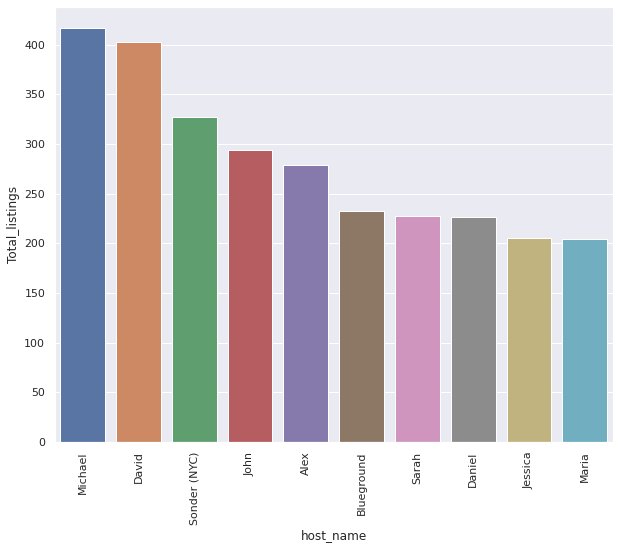

In [66]:
plt.figure(figsize=(10,8))

ax=sns.barplot(x='host_name',y='Total_listings',data=top_hosts)
for item in ax.get_xticklabels():
  item.set_rotation(90)

### Michael is found to have listed more listings in entire NYC with 417, followed by David.

## **4. Neighbourhood Groups with most listings counts**

In [67]:
df.neighbourhood_group.nunique()

5

In [68]:
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [69]:
top_neighbourhood_group = df.neighbourhood_group.value_counts().reset_index()
top_neighbourhood_group.rename(columns={'index':'Neighbourhodd_Group','neighbourhood_group':'Total_Listings'},inplace=True)
top_neighbourhood_group

,Neighbourhodd_Group,Total_Listings
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


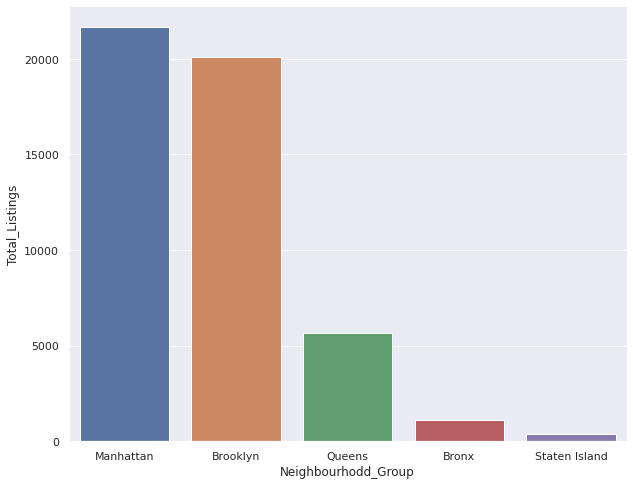

In [70]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x='Neighbourhodd_Group',y='Total_Listings',data=top_neighbourhood_group)

###  Manhattan is found to have high listed neighbourhood group more listings in entire NYC, followed by Brooklyn.

## **5.  Top 10 Neighbourhood on the basis of no of listings in entire NYC**

In [71]:
df.neighbourhood.nunique()

221

In [72]:
df.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [73]:
top_neighbourhood=df['neighbourhood'].value_counts()[:10].reset_index()
top_neighbourhood.rename(columns={'index':'neighbourhood','neighbourhood':'Total_listings'},inplace=True)
top_neighbourhood

,neighbourhood,Total_listings
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


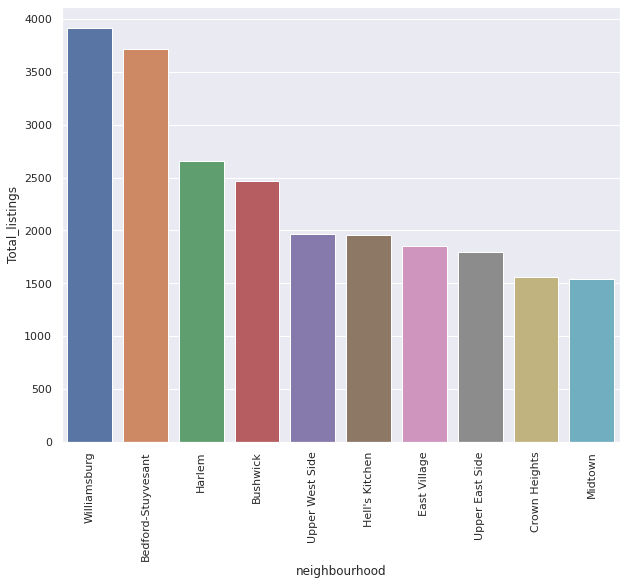

In [74]:
plt.figure(figsize=(10,8))

ax=sns.barplot(x='neighbourhood',y='Total_listings',data=top_neighbourhood)
for item in ax.get_xticklabels():
  item.set_rotation(90)

#### Williamsburg is found to have listed more listed neighbourhood in entire NYC with 3920, followed by Bedford-Stuyvesant.

## **6.  Room types with most listings counts**

In [75]:
df.room_type.nunique()

3

In [76]:
df.room_type.value_counts()


Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [77]:
top_rooms = df.room_type.value_counts().reset_index()
top_rooms.rename(columns={'index':'room_type','room_type':'Total_Listings'},inplace=True)
top_rooms

,room_type,Total_Listings
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


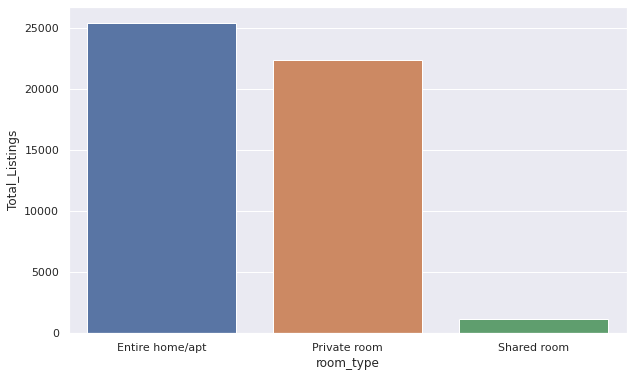

In [78]:
plt.figure(figsize=(10,6))

ax=sns.barplot(x='room_type',y='Total_Listings',data=top_rooms)

#### Entire home/Apt is found to have high listed room type with more listings in entire NYC, followed by Private room.

# **Numerical Column Analysis**

In [79]:
newdf.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.528963e+02,2.409335e+02,10.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,48895.0,8.062583e-01,1.502767e+00,0.00000,0.000000e+00,0.000000e+00,1.000000e+00,5.800000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


### **Observation :**

**Price:**
* The least price on listings is 10 dollars.
* The Average price on listings is 152 dollars
* The Max price on listings is 10,000 dollars.

**minimum_nights:**
* The min nights spent were 1.
* The Average nights spent were 7.
* The max nights spent were 1250.

**number_of_reviews:**
* The min number of reviews were 0.
* The number of reviews spent were 23.
* The max number of reviews were 629.

**reviews_per_month:**
* The min number of reviews per month were 0.
* The Average number of reviews per month were around 1.
* The max number of reviews per month were 58.

**calculated_host_listings_count:**
* The min number of listings by a host were 1.
* The Average number of listings by a host 7.
* The max number of listings by a host were 327.

**availability_365:**
* The min number of listings availability through year were 0.
* The Average number of listings availability through year around 113.
* The max number of listings availability through year were 365.

## **Top 25 used words for listing names**

In [80]:
#let's comeback now to the 'name' column as it will require litte bit more coding and continue to analyze it!

#initializing empty list where we are going to put our name strings
_names_=[]
#getting name strings from the column and appending it to the list
for name in df.name:
    _names_.append(name)

#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl

#initializing empty list where we are going to have words counted
_names_for_count_=[]

#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [81]:
#we are going to use counter
from collections import Counter
#let's see top 25 used words by host to name their listing
# Counting most common words
count_words = Counter(_names_for_count_).most_common()
count_words[:25]

[('in', 16733),
 ('room', 9389),
 ('bedroom', 7231),
 ('private', 6985),
 ('apartment', 6113),
 ('cozy', 4634),
 ('the', 3869),
 ('to', 3827),
 ('studio', 3772),
 ('brooklyn', 3629),
 ('apt', 3571),
 ('spacious', 3387),
 ('1', 3357),
 ('with', 3092),
 ('2', 3079),
 ('of', 2993),
 ('east', 2967),
 ('and', 2869),
 ('manhattan', 2855),
 ('&', 2820),
 ('park', 2632),
 ('sunny', 2536),
 ('beautiful', 2320),
 ('near', 2295),
 ('williamsburg', 2293)]

In [82]:
# Cleaning the List by removing prepositions
items_to_remove = {('in', 16733), ('the', 3869), ('to', 3827), ('of', 2993), ('-', 2272), ('a', 1909)}
top_25_cleaned = [e for e in count_words if e not in items_to_remove]
top_25 = top_25_cleaned[:25]
top_25

[('room', 9389),
 ('bedroom', 7231),
 ('private', 6985),
 ('apartment', 6113),
 ('cozy', 4634),
 ('studio', 3772),
 ('brooklyn', 3629),
 ('apt', 3571),
 ('spacious', 3387),
 ('1', 3357),
 ('with', 3092),
 ('2', 3079),
 ('east', 2967),
 ('and', 2869),
 ('manhattan', 2855),
 ('&', 2820),
 ('park', 2632),
 ('sunny', 2536),
 ('beautiful', 2320),
 ('near', 2295),
 ('williamsburg', 2293),
 ('village', 2055),
 ('heart', 2044),
 ('large', 1882),
 ('loft', 1822)]

In [83]:
#now let's put our findings in dataframe for further visualizations
sub_w=pd.DataFrame(top_25)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'spacious'),
 Text(0, 0, '1'),
 Text(0, 0, 'with'),
 Text(0, 0, '2'),
 Text(0, 0, 'east'),
 Text(0, 0, 'and'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, '&'),
 Text(0, 0, 'park'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'williamsburg'),
 Text(0, 0, 'village'),
 Text(0, 0, 'heart'),
 Text(0, 0, 'large'),
 Text(0, 0, 'loft')]

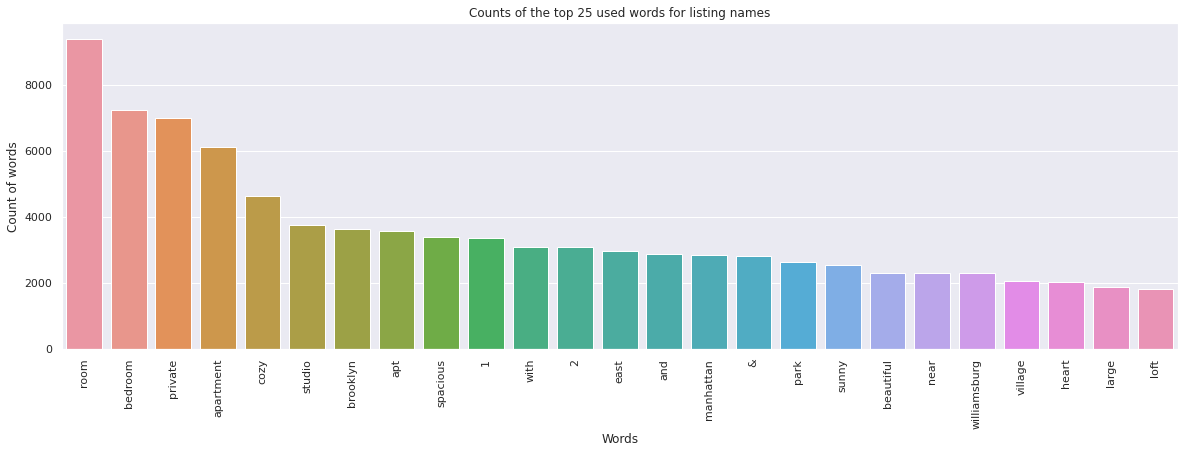

In [84]:
#we are going to use barplot for this visualization
viz_words=sns.barplot(x='Words', y='Count', data=sub_w)
viz_words.set_title('Counts of the top 25 used words for listing names')
viz_words.set_ylabel('Count of words')
viz_words.set_xlabel('Words')
viz_words.set_xticklabels(viz_words.get_xticklabels(), rotation=90)

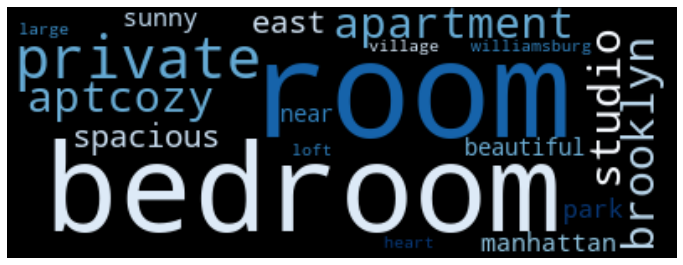

In [85]:
#Importing WordCloud library
from wordcloud import WordCloud, ImageColorGenerator
text = ' '.join(str(n) for n in sub_w.Words)

#Generating wordcloud image
wordcloud = WordCloud(max_font_size=80, colormap='Blues', width=400, height=150).generate(text)
plt.figure(figsize=(12,8))

#Displaying the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Bi-variate Analysis**

### **No of listings in Neighbourhood Group by Room types**

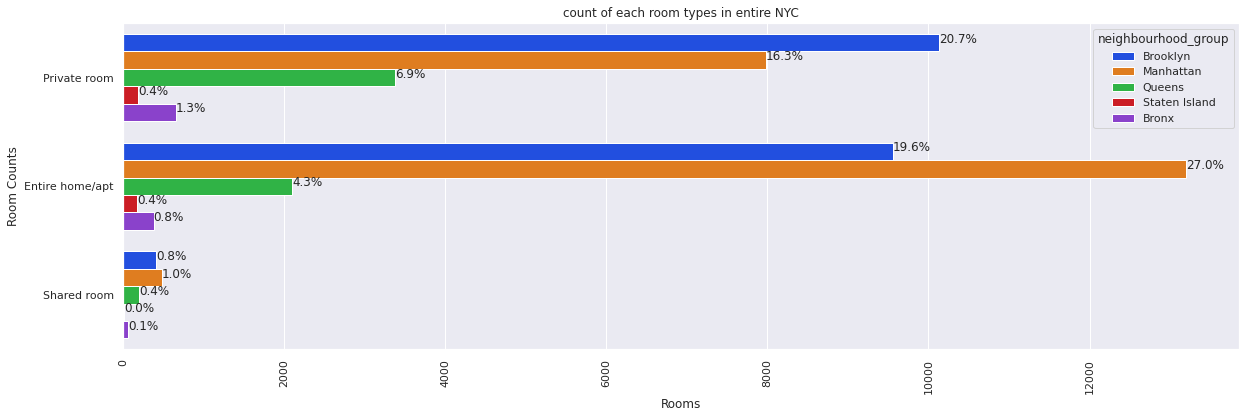

In [86]:
ax = sns.countplot(data=newdf,y="room_type", hue="neighbourhood_group",palette='bright')

total = len(df['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('count of each room types in entire NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

* Manhattan has more listed properties with Entire home/apt around 27% of total listed properties followed by Brooklyn with around 19.6%.

* Private rooms are more in Brooklyn as in 20.7% of the total listed properties followed by Manhattan with 16.3% of them. While 6.9% of private rooms are from Queens.

* Very few of the total listed have shared rooms listed on Airbnb where there's negligible or almost very rare shared rooms in Staten Island and Bronx.

* We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.

## **No of Hosts by Neighbourhood Group**

In [87]:
#Apply group by operation on neighbourhood_group for find the number of host according to location
no_of_host_per_location = newdf.groupby('neighbourhood_group',as_index=False)['host_id'].count().sort_values(['host_id'], ascending=False).rename(columns={'neighbourhood_group':'Location','host_id':'Host'})
no_of_host_per_location

,Location,Host
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


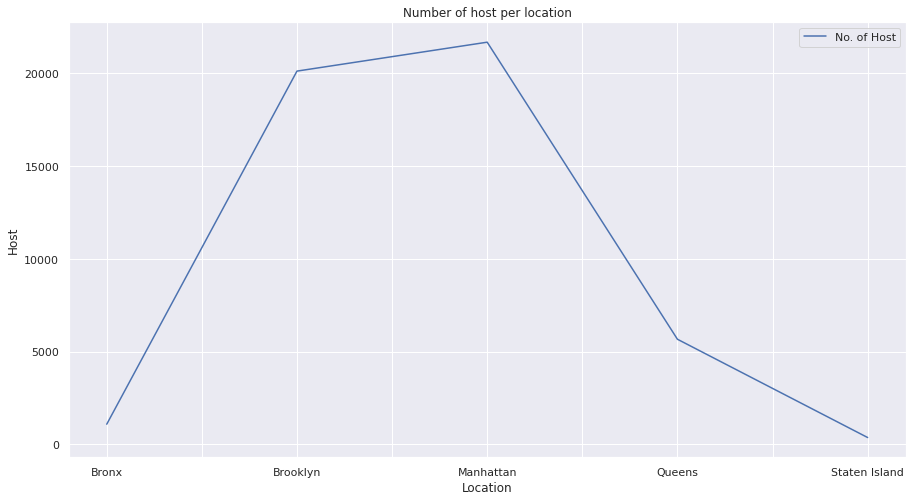

In [88]:
plt.figure(figsize=(15,8))

no_of_host_per_location =newdf.groupby('neighbourhood_group')['host_id'].count()
no_of_host_per_location.plot()
plt.title('Number of host per location')
plt.ylabel('Host')
plt.xlabel('Location')
plt.legend(labels = ['No. of Host'])

##  **Price (without extreme values) along neighbourhood groups**

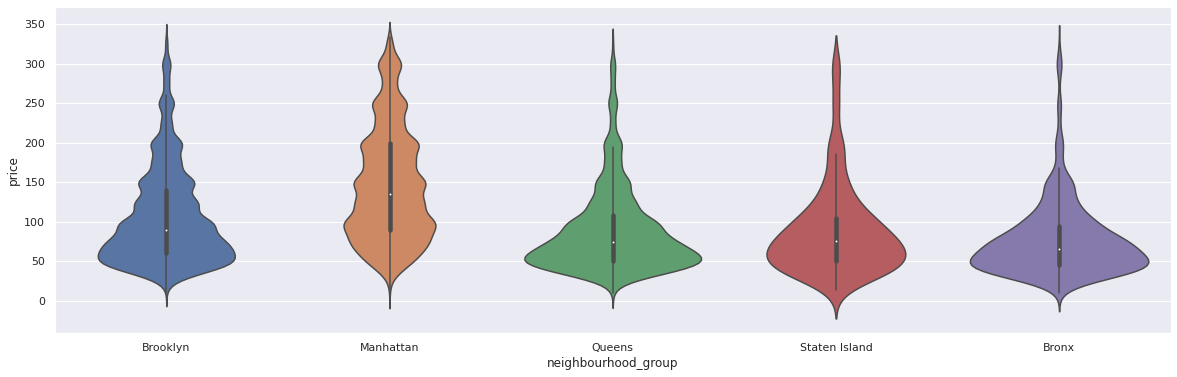

In [89]:
ax= sns.violinplot(x='neighbourhood_group',y='price',data=iqrdf)

* Manhattan being the most costliest place to live in, have price more than 140 USD followed by Brooklyn with around 80 USD on an average for the listings.

* Queens, Staten Island are on the same page with price on listings.

**Average Price Distribution**

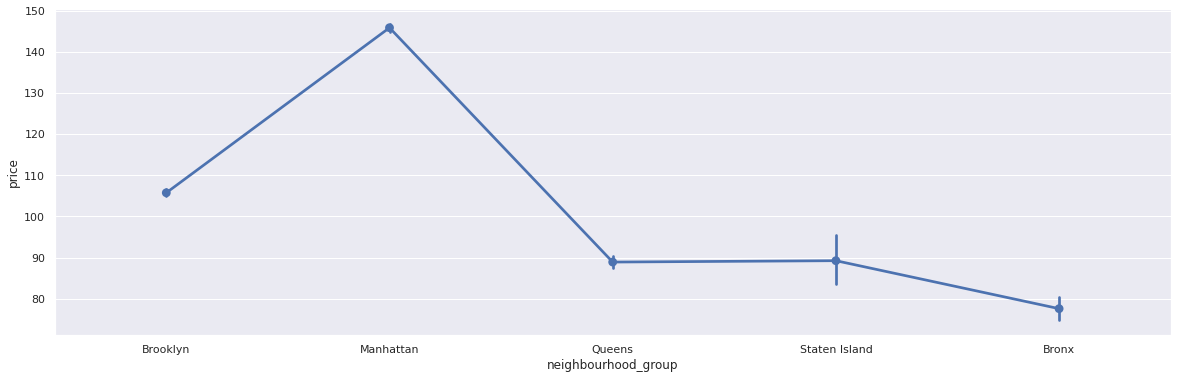

In [90]:
#looking for the average price each neighbourhood groups holds in a seaborn pointplot
sns.pointplot(x = 'neighbourhood_group', y='price', data=iqrdf, estimator=mean)

* We can see that Manhattan has the highest(the costliest) average of price ranging to ~150dollars/day followed by Brooklyn

* Queens and Staten Island have same average price/day, while Bronx comes out to be the cheapest neighbourhood group in NYC.

* Well, let's deep dive into cost of living as it is the most important factor for someone willing to rent/stay using Airbnb.

## **The highest and lowest rent according to neighbourhood group**

In [91]:
#Get the highest rent according to neighbourhood group
max_price_df = newdf.groupby('neighbourhood_group',as_index=False)['price'].max().sort_values(['price'],ascending = False).rename(columns = {'price':'Maximum price','neighbourhood_group':'Location'})
max_price_df

,Location,Maximum price
1,Brooklyn,10000
2,Manhattan,10000
3,Queens,10000
4,Staten Island,5000
0,Bronx,2500


* Brooklyn,Manhattan& Queens are highest renting neighbourhood groups

In [92]:
#Get the lowest rent according to neighbourhood group
min_price_df = newdf.groupby('neighbourhood_group',as_index=False)['price'].min().sort_values(['price'],ascending = True).rename(columns = {'price':'Minimum price','neighbourhood_group':'Location'})
min_price_df

,Location,Minimum price
0,Bronx,10
1,Brooklyn,10
2,Manhattan,10
3,Queens,10
4,Staten Island,13


* Brooklyn, Manhattan, Bronx & queens are the lowest renting neighbourhood groups



In [93]:
#Get the combine dataframe of minimum and maximum price according to location
merge_price_df = pd.merge(max_price_df, min_price_df, on='Location')
merge_price_df

,Location,Maximum price,Minimum price
0,Brooklyn,10000,10
1,Manhattan,10000,10
2,Queens,10000,10
3,Staten Island,5000,13
4,Bronx,2500,10


In [94]:
#Get the highest rent according to neighbourhood
max_price_neigh_df = newdf.groupby('neighbourhood',as_index=False)['price'].max().sort_values(['price'],ascending = False).rename(columns = {'price':'Minimum price'})
max_price_neigh_df[:10]

,neighbourhood,Minimum price
202,Upper West Side,10000
91,Greenpoint,10000
4,Astoria,10000
61,East Harlem,9999
119,Lower East Side,9999
197,Tribeca,8500
41,Clinton Hill,8000
201,Upper East Side,7703
6,Battery Park City,7500
60,East Flatbush,7500


* Upper west side,Greenpoint & Astoria are highest renting neighbourhoods

In [95]:
#Get the lowest rent according to neighbourhood
min_price_neigh_df = newdf.groupby('neighbourhood',as_index=False)['price'].min().sort_values(['price'],ascending = True).rename(columns = {'price':'Minimum_price'})
min_price_neigh_df[min_price_neigh_df['Minimum_price']==10]

,neighbourhood,Minimum_price
94,Harlem,10
91,Greenpoint,10
201,Upper East Side,10
202,Upper West Side,10
178,SoHo,10
13,Bedford-Stuyvesant,10
28,Bushwick,10
95,Hell's Kitchen,10
64,East Village,10
190,Sunset Park,10


In [96]:
len(min_price_neigh_df[min_price_neigh_df['Minimum_price']==10])

15

* There are 15 neighbourhoods where the lowest cost is 10 dollars

In [97]:
#Get the combine dataframe of minimum and maximum price according to location
merge_price_neigh_df = pd.merge(max_price_neigh_df, min_price_neigh_df, on='neighbourhood')
min_price_neigh_df[min_price_neigh_df['Minimum_price']==10]

,neighbourhood,Minimum_price
94,Harlem,10
91,Greenpoint,10
201,Upper East Side,10
202,Upper West Side,10
178,SoHo,10
13,Bedford-Stuyvesant,10
28,Bushwick,10
95,Hell's Kitchen,10
64,East Village,10
190,Sunset Park,10


## **The highest and lowest rent according to property**

In [98]:
#Get the highest rent according to property
max_price_name_df = newdf.groupby('name',as_index=False)['price'].max().sort_values(['price'],ascending = False)
max_price_name_df

,name,price
26757,Luxury 1 bedroom apt. -stunning Manhattan views,10000
19867,Furnished room in Astoria apartment,10000
1107,1-BR Lincoln Center,10000
35502,"Quiet, Clean, Lit @ LES & Chinatown",9999
2213,2br - The Heart of NYC: Manhattans Lower East ...,9999
...,...,...
13919,Couch in Harlem Harvey Refugees only,10
23148,IT'S SIMPLY CONVENIENT!,10
45572,Voted #1 Airbnb In NYC,10
11764,"Charming, bright and brand new Bed-Stuy home",10


* Luxury 1 bedroom apt. -stunning Manhattan views ,Furnished room in Astoria apartment & 1-BR Lincoln Center are highest renting property with 10,000 dollars

In [99]:
#Get the lowest rent according to location
min_price_name_df = newdf.groupby('name',as_index=False)['price'].min().sort_values(['price'],ascending = True)
min_price_name_df

,name,price
23148,IT'S SIMPLY CONVENIENT!,10
36587,Room with a view,10
16449,Cozy room in a three-bedroom House,10
23510,Jen Apt,10
45572,Voted #1 Airbnb In NYC,10
...,...,...
35502,"Quiet, Clean, Lit @ LES & Chinatown",9999
2213,2br - The Heart of NYC: Manhattans Lower East ...,9999
1107,1-BR Lincoln Center,10000
26757,Luxury 1 bedroom apt. -stunning Manhattan views,10000


In [100]:
min_price_name_df[min_price_name_df['price']==10]

,name,price
23148,IT'S SIMPLY CONVENIENT!,10
36587,Room with a view,10
16449,Cozy room in a three-bedroom House,10
23510,Jen Apt,10
45572,Voted #1 Airbnb In NYC,10
11764,"Charming, bright and brand new Bed-Stuy home",10
16047,Cozy feel at home studio,10
6766,Beautiful room in Bushwick,10
20163,Gigantic Sunny Room in Park Slope-Private Back...,10
45434,"Very Spacious bedroom, steps from CENTRAL PARK.",10


In [101]:
len(min_price_name_df[min_price_name_df['price']==10])

17

* These 17 listings are the cheapest listings according to price on nyc

## **Average for how many nights people stayed in each room_types!**

Text(0, 0.5, 'Min Stays')

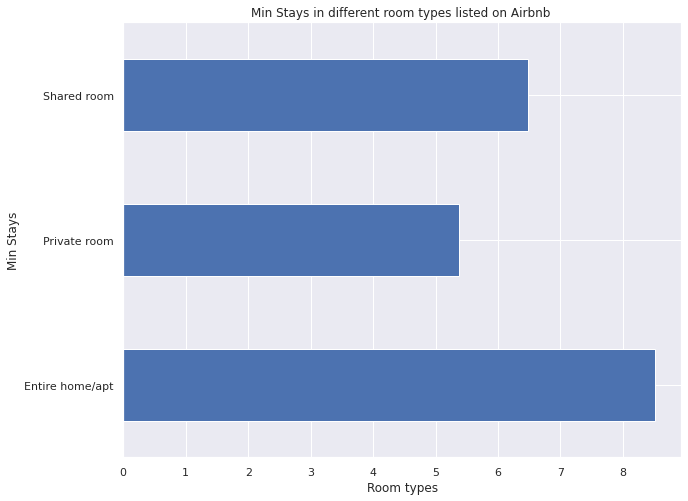

In [102]:
plt.figure(figsize=(10,8))

newdf.groupby('room_type')['minimum_nights'].mean().plot(kind='barh',color='b')

plt.title('Min Stays in different room types listed on Airbnb ')
plt.xlabel('Room types')
plt.ylabel('Min Stays')

Looking at these it clearly indicates that people mostly prefer living in an entire home/apt on an average of more than 8 nights followed by guests who stayed inshared room where average stay is 6-7 nights.

## **Multi-variate Analysis**

### **Distribution of price(without extreme values) along neighbourhood groups with room types**

In [103]:
iqrdf['neighbourhood_group'].value_counts()

Manhattan        19501
Brooklyn         19411
Queens            5567
Bronx             1070
Staten Island      365
Name: neighbourhood_group, dtype: int64

In [104]:
#Unstack the group by information for plot the graph
avg_preffered_price_df = iqrdf.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_preffered_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,112.195592,60.922840,47.254237
Brooklyn,148.218656,70.364179,48.271394
Manhattan,181.649305,98.057700,75.939785
Queens,131.328388,65.732319,46.989691
Staten Island,121.089286,62.292553,57.444444


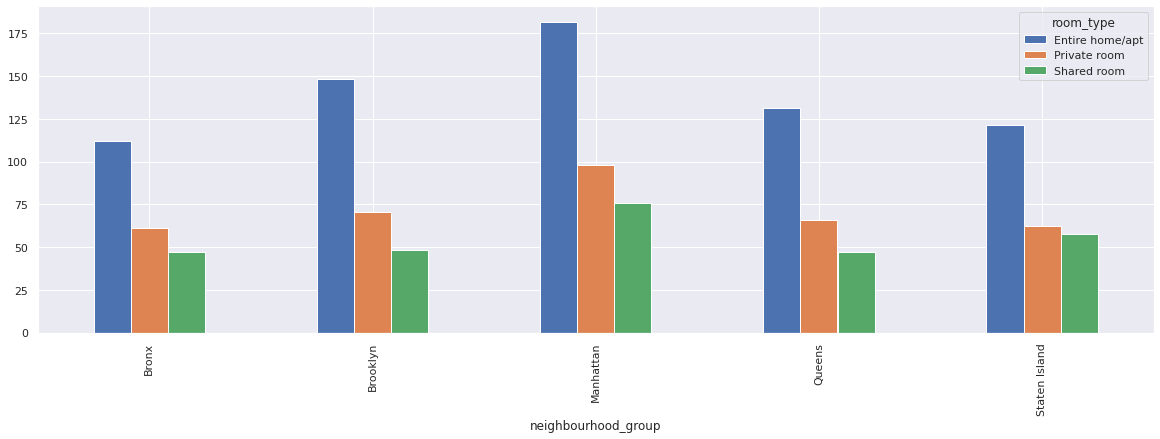

In [105]:
#Graph of average price of property according to location
avg_preffered_price_df.plot.bar()

* Manhattan is leading in all three roomtypes on average price across nyc

### **Expensive & cheapest listings with respect to prices leading in entire NYC!**

In [106]:
newdf.nlargest(5,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type']]

,name,neighbourhood_group,neighbourhood,host_name,room_type
9151,Furnished room in Astoria apartment,Queens,Astoria,Kathrine,Private room
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,Erin,Entire home/apt
29238,1-BR Lincoln Center,Manhattan,Upper West Side,Jelena,Entire home/apt
6530,Spanish Harlem Apt,Manhattan,East Harlem,Olson,Entire home/apt
12342,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,Lower East Side,Amy,Private room


* Queens is top the list followed by brooklyn. Looks like the all the top 3,4 & 5 costliest listings belongs to Manhattan itself(being the most costliest place of living in NYC)

In [107]:

newdf.sort_values(by='price',ascending=True)[['name','neighbourhood_group','neighbourhood','host_name','room_type']][:5]

,name,neighbourhood_group,neighbourhood,host_name,room_type
31066,"Very Spacious bedroom, steps from CENTRAL PARK.",Manhattan,Upper West Side,Salim,Private room
33225,Voted #1 Airbnb In NYC,Queens,Jamaica,Maria,Entire home/apt
34446,Bronx Apart,Bronx,Highbridge,Luz,Private room
21700,Couch in Harlem Harvey Refugees only,Manhattan,Harlem,Morgan,Shared room
22835,IT'S SIMPLY CONVENIENT!,Queens,Jamaica,Maria,Entire home/apt


* cheapest listings mostly comes from Manhatten and Queens.

### **Top neighbourhoods in NYC with respect to average price/day**

In [108]:
df_ngrp= iqrdf.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()

In [109]:
top_neigh_each= df_ngrp.loc[df_ngrp.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price',ascending=False)
top_neigh_each

,neighbourhood_group,neighbourhood,price
218,Staten Island,Willowbrook,249.000000
163,Queens,Neponsit,237.000000
121,Manhattan,Tribeca,212.495327
82,Brooklyn,Mill Basin,179.750000
44,Bronx,West Farms,122.000000


Among the top neighbourhoods in each neighbourhood groups, top 2 of them namely: **Fort Wadsworth** & **Tribeca, origins from Staten Island & Manhattan.**

**Seagate** from **Brooklyn** and **Riverdale** from **Bronx**. **Neponsit** from **Queens**.

Text(0, 0.5, 'price')

<Figure size 720x576 with 0 Axes>

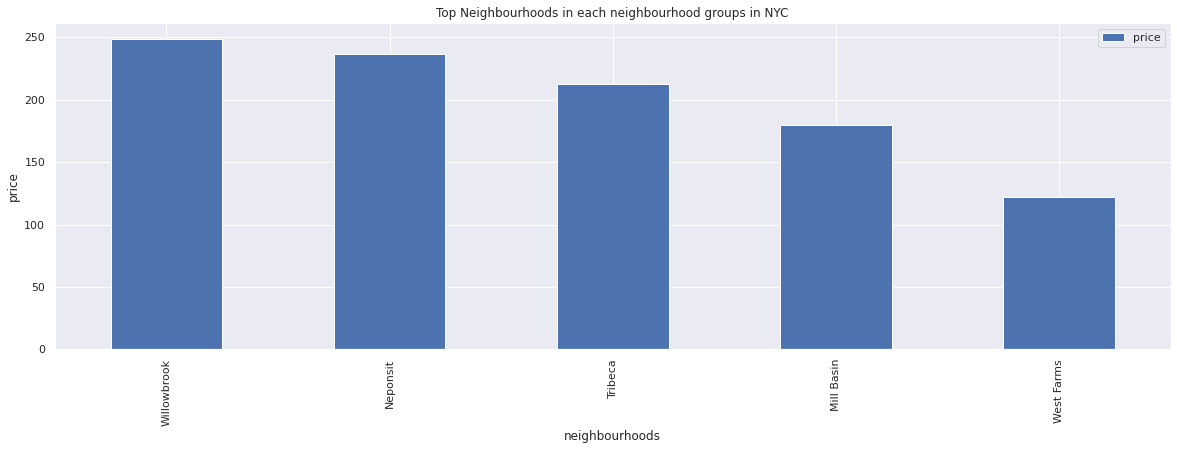

In [110]:
plt.figure(figsize=(10,8))
top_neigh_each.plot.bar(x='neighbourhood', rot=90, title='Top Neighbourhoods in each neighbourhood groups in NYC')

plt.xlabel('neighbourhoods')
plt.ylabel('price')

### **Costliest listings in each neighbourhood groups & their respective hosts:**

In [111]:
costliest_df= newdf.loc[newdf.groupby(['neighbourhood_group'])['price'].idxmax()][['name','neighbourhood_group','host_name','price']]

In [112]:
costliest_df.sort_values(by='price',ascending=False)

,name,neighbourhood_group,host_name,price
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Erin,10000
29238,1-BR Lincoln Center,Manhattan,Jelena,10000
9151,Furnished room in Astoria apartment,Queens,Kathrine,10000
22353,Victorian Film location,Staten Island,Alissa,5000
24477,"""The luxury of Comfort""",Bronx,Kathy,2500


* Looks like the top 2 costliest listings: Luxury 1 bedroom apt. -stunning Manhattan views & 1-BR Lincoln Center were from Brooklyn and Manhattan, hosted by Erin and jelena respectively.

### **cheapest listings in each neighbourhood groups & their respective hosts:**

In [113]:
cheapest_df= newdf.loc[newdf.groupby('neighbourhood_group')['price'].idxmin()][['neighbourhood_group','name','host_name','price']]

In [114]:
cheapest_df.sort_values(by='price',ascending=True)

,neighbourhood_group,name,host_name,price
34446,Bronx,Bronx Apart,Luz,10
22261,Brooklyn,"Newly renovated, fully furnished room in Brooklyn",Katie,10
2860,Manhattan,Large furnished 2 bedrooms- - 30 days Minimum,Sally,10
22835,Queens,IT'S SIMPLY CONVENIENT!,Maria,10
45646,Staten Island,Happy Home 3,Raquel,13


* Looks almost all the neighbourhood groups with the lowest price falls in the same price range for the cheapest listings.

## **Room_types vs Price on different neighbourhood groups!**

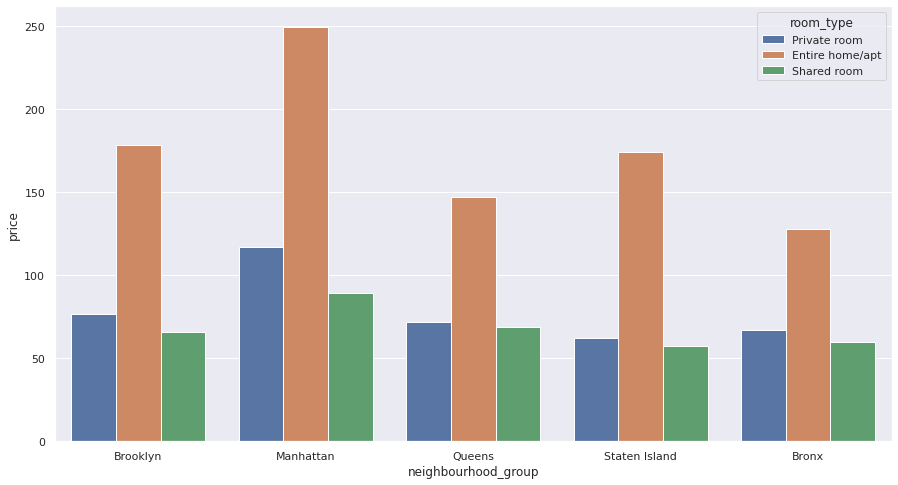

In [115]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="neighbourhood_group", y="price", hue="room_type", data=newdf,ci=None)

* Looks like a property/listing with Entire home/apt as room_type wins the show at NYC followed by private rooms.

* Manhattan has the highest price for room types with Entire home/apt ranging to nearly 240 USD/night, followed by Private room with 110 USD/night. And it's obvious being the most expensive place to live in!

### **Top 10 most reviewed listings in NYC!**

In [116]:
top10_reviewed_listings= newdf.nlargest(10,'reviews_per_month')
top10_reviewed_listings[['name','reviews_per_month','neighbourhood_group']]

,name,reviews_per_month,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,58,Manhattan
42076,Great Room in the heart of Times Square!,27,Manhattan
38870,Lou's Palace-So much for so little,20,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16,Queens
36238,“For Heaven Cakes”,15,Queens
40036,6 Minutes From JFK Airport Cozy Bedroom,15,Queens


* So, this are the listings with highest number of reviews, the highest being: Enjoy great views of the City in our Deluxe Room! with 58 reviews/month followed by Great Room in the heart of Times Square! with a total of 27 reviews/month. Top 2 are from Manhattan so we can decide the best suited place for a comfortable stay but the prices are high to afford.

* Also, Lets look how monthly reviews varies with room types in each neighbourhood groups!

#### **Average Price In Top 10 Reviewed Listings Per Night**

In [117]:
price_avrg=top10_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 72.5


## **Most Reviewed room_types in each Neighbourhood Groups**

Text(0.5, 1.0, 'Most Reviewed room_types in each Neighbourhood Groups')

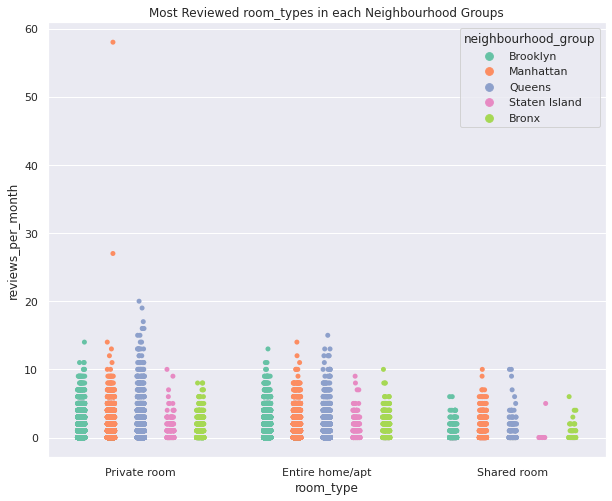

In [118]:
f,ax = plt.subplots(figsize=(10,8))
ax= sns.stripplot(x='room_type',y='reviews_per_month',hue='neighbourhood_group',dodge=True,data=newdf,palette='Set2')
ax.set_title('Most Reviewed room_types in each Neighbourhood Groups')

* We can see that Private room recieved the most no of reviews/month where Manhattan had the highest reviews received for Private rooms with more than 50 reviews/month, followed by Manhattan in the chase.

* Manhattan & Queens got the most no of reviews for Entire home/apt room type.

* There were less reviews recieved from shared rooms as compared to other room types and it was from Staten Island followed by Bronx.

## **Top 10 reviewed hosts on the basis of reviews/month.**

Text(0.5, 1.0, 'Top 10 Reviews/month received by hosts')

<Figure size 720x576 with 0 Axes>

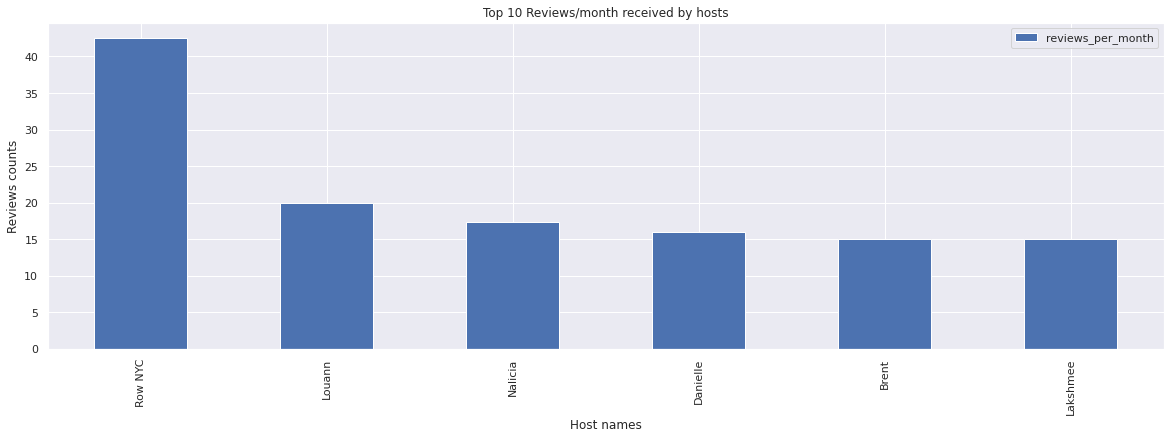

In [119]:
plt.figure(figsize=(10,8))

#there are cases where same hosts are hosting multiple properties in same/different areas.
reviews_df=top10_reviewed_listings.groupby('host_name')['reviews_per_month'].mean() 
reviews_df=reviews_df.reset_index().sort_values(by='reviews_per_month',ascending=False)
reviews_df.plot(x='host_name',y='reviews_per_month',kind='bar',color='b')
plt.ylabel('Reviews counts')
plt.xlabel('Host names')
plt.title('Top 10 Reviews/month received by hosts')


##  **Hosts with most no of listings in NYC**

In [120]:
host_with_most_listings= newdf.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index()
largest_listings_df= host_with_most_listings.nlargest(10,'calculated_host_listings_count')
largest_listings_df

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,106929
1834,Blueground,Manhattan,53360
7275,Kara,Manhattan,14669
6540,Jeremy & Laura,Manhattan,9216
13216,Sonder,Manhattan,9216
2901,Corporate Housing,Manhattan,8281
7480,Kazuya,Queens,8137
7546,Ken,Manhattan,7500
11399,Pranjal,Manhattan,4225
9856,Mike,Manhattan,2824


* So, Sonder(NYC) leads the most expensive neighbourhood group in NYC with around 106929 properties listed followed by Blueground and Kara.

* Also, all 3 of them has their listings on Manhattan.

## **Hosts with most listings in each neighbourhood group.**

In [121]:
hosts_df=host_with_most_listings.groupby(['neighbourhood_group'])['calculated_host_listings_count'].transform(max) == host_with_most_listings['calculated_host_listings_count']
host_with_most_listings[hosts_df].sort_values(by='calculated_host_listings_count',ascending=False)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,106929
7480,Kazuya,Queens,8137
14432,Vida,Brooklyn,2705
14435,Vie,Bronx,169
685,Amarjit S,Staten Island,64


* Sonder (NYC), Kazuya, Vida, Vie and Amarjit are the hosts with most no of listings in each neighbourhood groups in entire NYC!

## **Room_types and their relation with availability in different neighbourhood groups!**

<Figure size 720x576 with 0 Axes>

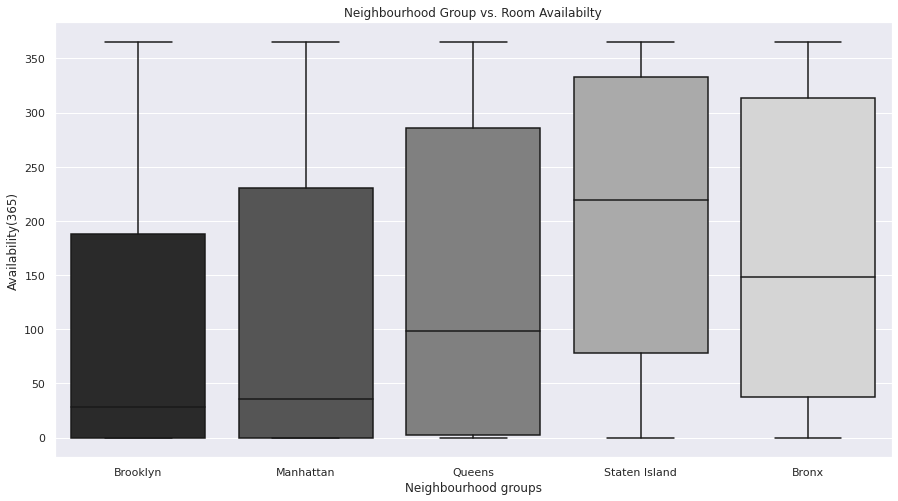

In [122]:
plt.figure(figsize=(10,8))

f,ax = plt.subplots(figsize=(15,8))
ax=sns.boxplot(x='neighbourhood_group',y='availability_365',data=newdf,palette="gist_gray")
plt.title("Neighbourhood Group vs. Room Availabilty")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability(365)')
plt.show()

* Looking at the above categorical box plot we can infer that the listings in Staten Island seems to be more available throughout the year to more than 300 days. 

* On an average, these listings are available to around 210 days every year followed by Bronx where every listings are available for 150 on an average every year.

## **Neighbourhood groups visualization with latitude and longitude!**

Text(0.5, 1.0, 'Location Co-ordinates')

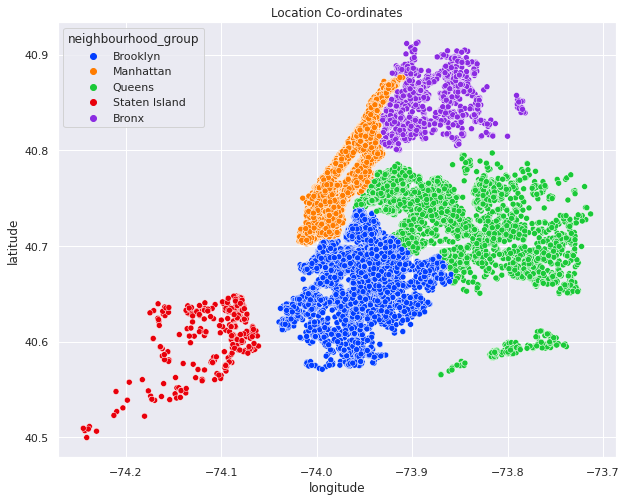

In [123]:
#trying to find where the coordinates belong from the latitude and longitude
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=newdf, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')

## **Types of Rooms visualization with latitude and longitude!**

Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

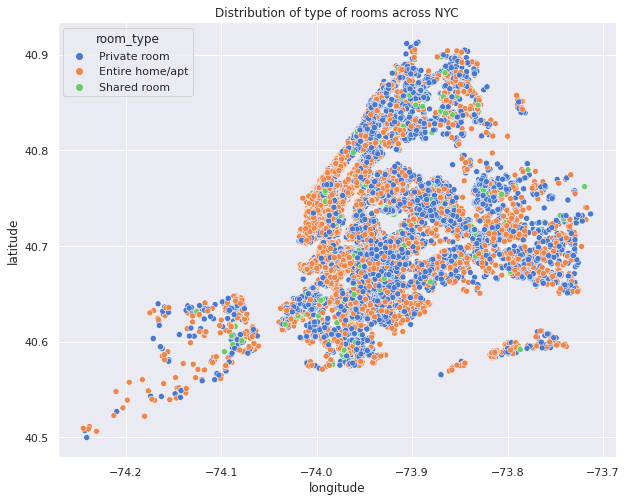

In [124]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(x="longitude", y="latitude",hue="room_type",data=newdf,palette='muted')
ax.set_title('Distribution of type of rooms across NYC')

* By the two scatterplots of latitude vs longitude we can infer there's is very less shared room throughout NYC as compared to private and Entire home/apt.

* 95% of the listings on Airbnb are either Private room or Entire/home apt. Very few guests had opted for shared rooms on Airbnb.

* Also, guests mostly prefer this room types when they are looking for a rent on Airbnb as we found out previously in our analysis.

# **Conclusion:**

* Hillside Hotel is found to have listed more listings in entire NYC, followed by Home away from Home.

* Host id 219517861 is found to have listed more listings in entire NYC with 327, followed by 107434423.

* Michael is found to have listed more listings in entire NYC with 417, followed by David.

* Manhattan is found to have high listed neighbourhood group more listings in entire NYC, followed by Brooklyn.

* Entire home/Apt is found to have high listed room type with more listings in entire NYC

* Manhattan has more listed properties with Entire home/apt around 27% of total listed properties followed by Brooklyn with around 19.6%.

* Brooklyn,Manhattan& Queens are highest as well as lowest renting neighbourhood groups

* Manhattan is leading in all three roomtypes on average price across nyc

* Staten Island seems to be more available throughout the year to more than 300 days. On an average, these listings are available to around 210 days every year followed by Bronx where every listings are available for 150 on an average every year.

* Manhattan has the highest(the costliest) average of price 

* Sonder(NYC) leads the most expensive neighbourhood group in NYC

